In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


In [6]:
# Assume your DataFrame is df
df = pd.read_csv('Data/wine-quality-white-and-red.csv')

In [7]:
# Add quality labels in categories
def qualityLabel(qual):
  if qual <= 6:
    return 'low'
  else:
    return 'high'

df['quality label'] = df['quality'].apply(qualityLabel)
df.head()

# Create an encoding of the quality label (target)
df['quality label encoded'] = df['quality label'].map({'low': 0, 'high': 1})
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label,quality label encoded
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,low,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,low,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,low,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,low,0


In [8]:
# 🧹 Step 1: Prepare features and target
X = df.drop(columns=['type','quality',  'quality label','quality label encoded'])  # Drop target columns
y = df['quality label encoded']  # Assume this is a binary target: 0 (low), 1 (high)



In [9]:
# Binarize for ROC-AUC multiclass (if needed for 3+ classes)
classes = sorted(y.unique())
y_bin = label_binarize(y, classes=classes)



In [10]:
# 🧪 Step 2: Train/Test split
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(
    X, y, y_bin, test_size=0.2, stratify=y, random_state=42)



In [11]:
# ⚖️ Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:

# 🚀 Step 4: Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)
y_proba_logreg = logreg.predict_proba(X_test_scaled)



In [13]:
# 🌲 Step 5: Train Decision Tree
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree.fit(X_train, y_train)
y_proba_tree = tree.predict_proba(X_test)



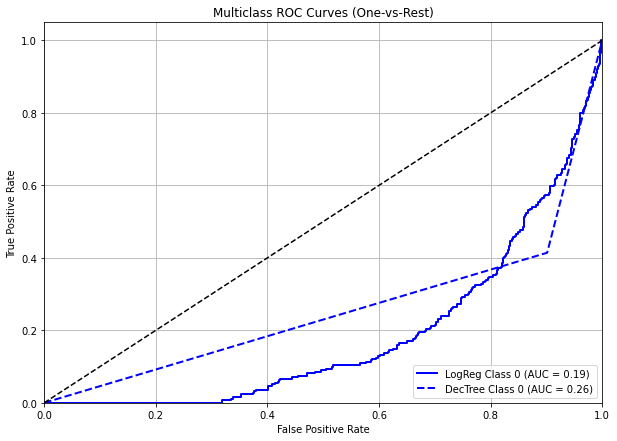

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assume: y_bin_test is binarized y_test
n_classes = y_bin_test.shape[1]
colors = cycle(['blue', 'green', 'darkorange'])

plt.figure(figsize=(10, 7))

# Logistic Regression ROC
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_bin_test[:, i], y_proba_logreg[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'LogReg Class {i} (AUC = {roc_auc:.2f})')

# Reset color cycle for decision tree
colors = cycle(['blue', 'green', 'darkorange'])

# Decision Tree ROC
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_bin_test[:, i], y_proba_tree[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, linestyle='--',
             label=f'DecTree Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [16]:
# 📈 Step 7: Plot ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_bin_test.ravel(), y_proba_logreg.ravel())
fpr_tree, tpr_tree, _ = roc_curve(y_bin_test.ravel(), y_proba_tree.ravel())

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {tree_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1300, 2600]